In [1]:
import os
import sys
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['axes.formatter.useoffset'] = False

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def formatAxes(ax,text_size=10,xlim=None,xlabel=None,xticks=None,xticklabels=None,ylim=None,yticks=None,ylabel=None,yticklabels=None):
    """ to tweak the plotting of the axes as well as the fontsize """
    for loc,spine in list(ax.spines.items()):
        if loc == 'left': # settings for the y-axis
            if yticklabels and not yticks:
                sys.stderr.write("Need to provide a list wiht both y-labels and y-ticks!")
            if yticks:
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_tick_params(direction='out')
                spine.set_visible(True)
                spine.set_position(("outward",1))
                spine.set_smart_bounds(True)
                ax.set_yticks(yticks)
                if ylim:
                    ax.set_ylim(ylim)
                if yticklabels:
                    ax.set_yticklabels(yticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_yticklabels([])
                ax.tick_params(axis='y',which='both',length=0)
                
            if ylabel:
                ax.set_ylabel(ylabel,fontsize=text_size,rotation=0,labelpad=160)
                ax.get_yaxis().set_label_coords(-0.1,0.5)
        elif loc == 'bottom': # settings for x-axis
            if xticks:
                spine.set_position('zero')
                spine.set_visible(False)
                spine.set_smart_bounds(False)
                ax.set_xticks(xticks)
                ax.tick_params(axis='x',which='both',length=0)
                if xlim:
                    ax.set_xlim(xlim)
                if xticklabels:
                    ax.set_xticklabels(xticklabels,fontsize=text_size)
            else:
                spine.set_visible(False)
                ax.set_xticklabels([])
                ax.tick_params(axis='x',which='both',length=0)
                
            if xlabel:
                ax.tick_params(axis='x',which='both',length=0)
                ax.set_xlabel(xlabel,fontsize=text_size+2)
                ax.xaxis.labelpad = 10
        else:
            spine.set_visible(False)
    ax.patch.set_visible(False)

In [38]:
## Loading the data
alldata  = pd.read_csv('../../../big_dataframe_Xist_diffBUM_HMM_scaled_dc_regions_removed_deltaSHAPE_corrected.txt',sep="\t",header=0,index_col=0)
previous = pd.read_csv('../../../big_dataframe_Xist_regions_removed_deltaSHAPE_corrected.txt',sep="\t",header=0,index_col=0)

In [39]:
alldata.head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR,DeltaSHAPE_in_vivo
0,1,C,0,0,0.0,0,0,0,0,0,0,1.693237e-14,1.790644e-20,0,1.0
1,2,G,0,0,0.0,0,0,0,0,0,0,6.789051e-03,6.823904e-03,0,1.0
2,3,G,0,0,0.0,0,0,0,0,0,0,9.031615e-03,9.110841e-03,0,1.0
3,4,C,0,0,0.0,0,0,0,0,0,0,6.793530e-03,6.927069e-03,0,1.0
4,5,T,0,0,0.0,0,0,0,0,0,0,1.128597e-08,5.186918e-06,0,1.0


In [40]:
previous.head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR,DeltaSHAPE_in_vivo
0,1,C,0,0,0.0,0,0,0,0,0,0,9.079400e-11,3.025526e-31,0,1.0
1,2,G,0,0,0.0,0,0,0,0,0,0,2.755947e-03,2.754797e-03,0,1.0
2,3,G,0,0,0.0,0,0,0,0,0,0,4.410761e-35,2.410406e-65,0,1.0
3,4,C,0,0,0.0,0,0,0,0,0,0,2.754800e-03,2.754800e-03,0,1.0
4,5,T,0,0,0.0,0,0,0,0,0,0,3.113083e-30,1.367282e-82,0,1.0


In [41]:
### Merging the two datasets and only keeping those that had deltaSHAPE values in both

In [42]:
deltashaperepone.merge(deltashapereptwo)

,Chromosome,Start,End,Feature,deltaSHAPE,deltaSHAPE_rep1
0,mm10_XIST,247,248,deltaSHAPE,1.307304,1.398904
1,mm10_XIST,315,316,deltaSHAPE,1.747989,1.986579
2,mm10_XIST,316,317,deltaSHAPE,1.685508,1.707376
3,mm10_XIST,317,318,deltaSHAPE,1.280143,1.423275
4,mm10_XIST,4700,4701,deltaSHAPE,-1.373647,2.334900
...,...,...,...,...,...,...
185,mm10_XIST,15808,15809,deltaSHAPE,-2.555324,-1.980627
186,mm10_XIST,17080,17081,deltaSHAPE,-1.199562,-0.954098
187,mm10_XIST,17081,17082,deltaSHAPE,-0.870374,-1.004517
188,mm10_XIST,17082,17083,deltaSHAPE,-0.905616,-0.983025


### Count number of DRNs in diffBUM_HMM data:

In [43]:
threshold = 0.95

counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['diffBUMHMM_ex_vivo'] > threshold:
        counter = counter+1    
    elif row['diffBUMHMM_in_cell'] > threshold:
        counter2= counter2 +1
    else:
        continue
        
print("ex_vivo\t",counter)
print("in_vivo\t",counter2)

ex_vivo	 1739
in_vivo	 188


### How many binding sites for each protein were found that overlapped with modified nucleotides in the ex vivo data?

In [44]:
morereactive_ex_vivo = alldata[alldata.diffBUMHMM_ex_vivo > threshold]
proteins = alldata.columns[5:11]

In [45]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))

CELF1	total_count:	60
FUS	total_count:	375
HuR	total_count:	96
PTBP1	total_count:	53
RBFOX2	total_count:	2
TARDBP	total_count:	58


In [46]:
##IN CELL

In [47]:
morereactive_in_cell = alldata[alldata.diffBUMHMM_in_cell > threshold]
proteins = alldata.columns[5:11]

In [48]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_in_cell[protein].sum()))

CELF1	total_count:	11
FUS	total_count:	33
HuR	total_count:	17
PTBP1	total_count:	10
RBFOX2	total_count:	2
TARDBP	total_count:	2


### Same but in delta_SHAPE

In [49]:
alldata[alldata.DeltaSHAPE_ex_vivo > 0].head()

,nucleotide_number,nucleotide_identity,DeltaSHAPE_ex_vivo,DeltaSHAPE_in_cell,average_deltaSHAPE,CELF1,FUS,HuR,PTBP1,RBFOX2,TARDBP,diffBUMHMM_in_cell,diffBUMHMM_ex_vivo,dStruct_DDR,DeltaSHAPE_in_vivo
209,210,T,1,0,1.365817,0,0,0,0,0,0,3.341549e-04,4.392628e-01,1,NaN
210,211,T,1,0,1.504202,0,0,0,0,0,0,6.123091e-24,1.242867e-52,1,NaN
211,212,T,1,0,1.721811,0,0,0,0,0,0,1.802013e-04,2.930757e-01,1,NaN
243,244,A,1,0,1.628085,0,0,1,0,0,0,2.619692e-12,3.105350e-56,1,NaN
244,245,T,1,0,2.116178,0,0,1,0,0,0,1.021677e-03,2.388718e-01,1,NaN


In [50]:
counter = 0
counter2 = 0
for index, row in alldata.iterrows():
    if row['DeltaSHAPE_ex_vivo'] > 0.0:
        counter = counter+1    
    elif row['DeltaSHAPE_in_cell'] > 0.0:
        counter2= counter2 +1
    else:
        continue
        
print("dSHAPE ex vivo %s" % counter)
print("dSHAPE in vivo %s" % counter2)

dSHAPE ex vivo 866
dSHAPE in vivo 683


In [51]:
morereactive_ex_vivo = alldata[alldata.DeltaSHAPE_ex_vivo > 0]

In [52]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_ex_vivo[protein].sum()))

CELF1	total_count:	104
FUS	total_count:	162
HuR	total_count:	171
PTBP1	total_count:	95
RBFOX2	total_count:	3
TARDBP	total_count:	8


In [53]:
##IN CELL

In [54]:
morereactive_in_cell_deltashape = alldata[alldata.DeltaSHAPE_in_cell > 0]

In [55]:
for protein in proteins:
    print("%s\ttotal_count:\t%s" % (protein,morereactive_in_cell_deltashape[protein].sum()))

CELF1	total_count:	24
FUS	total_count:	192
HuR	total_count:	34
PTBP1	total_count:	21
RBFOX2	total_count:	0
TARDBP	total_count:	16


In [56]:
print(alldata.columns)

Index(['nucleotide_number', 'nucleotide_identity', 'DeltaSHAPE_ex_vivo',
       'DeltaSHAPE_in_cell', 'average_deltaSHAPE', 'CELF1', 'FUS', 'HuR',
       'PTBP1', 'RBFOX2', 'TARDBP', 'diffBUMHMM_in_cell', 'diffBUMHMM_ex_vivo',
       'dStruct_DDR', 'DeltaSHAPE_in_vivo'],
      dtype='object')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


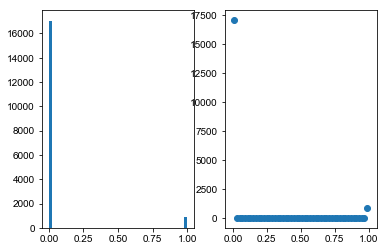

In [57]:
npa= alldata.as_matrix(columns=alldata.columns[2:3])

npasqueeze= np.squeeze(npa)

fig = plt.figure()
ax1 = fig.add_subplot(121)
n, bins, patches = ax1.hist(npasqueeze, bins=50)  # output is two arrays

# Scatter plot
# Now we find the center of each bin from the bin edges
bins_mean = [0.5 * (bins[i] + bins[i+1]) for i in range(len(n))]
ax2 = fig.add_subplot(122)
ax2.scatter(bins_mean, n)
plt.show()


In [58]:
#FOR DELTASHAPE

npa = alldata.as_matrix(columns=alldata.columns[2:3])
y= np.squeeze(npa)

npa2 = alldata.as_matrix(columns=alldata.columns[0:1])
x= np.squeeze(npa2)
#print(x.shape)

nbins = 300

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.plot(x, y, 'bo')
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

#fig = plt.figure(figsize=(20, 2))
#ax = fig.add_subplot(111)
#ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

#print(n)
#print(sy)
#print(mean)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [59]:
#FOR DIFFBUMHMM ex vivo

npa= alldata.as_matrix(columns=alldata.columns[12:13])
y= np.squeeze(npa)
y[y < 0.95] = 0 
#print(y)

npa2= alldata.as_matrix(columns=alldata.columns[0:1])
x= np.squeeze(npa2)
#print(x.shape)

nbins = 300

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.plot(x, y, 'bo')
#plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

#fig = plt.figure(figsize=(20, 2))
#ax = fig.add_subplot(111)
#ax.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')

#print(n)
#print(sy)
#print(mean)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [60]:
alldata.columns[12:13]

Index(['diffBUMHMM_ex_vivo'], dtype='object')

### Making the plot:

/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support array([0., 0., 0., ..., 0., 0., 0.]) instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)


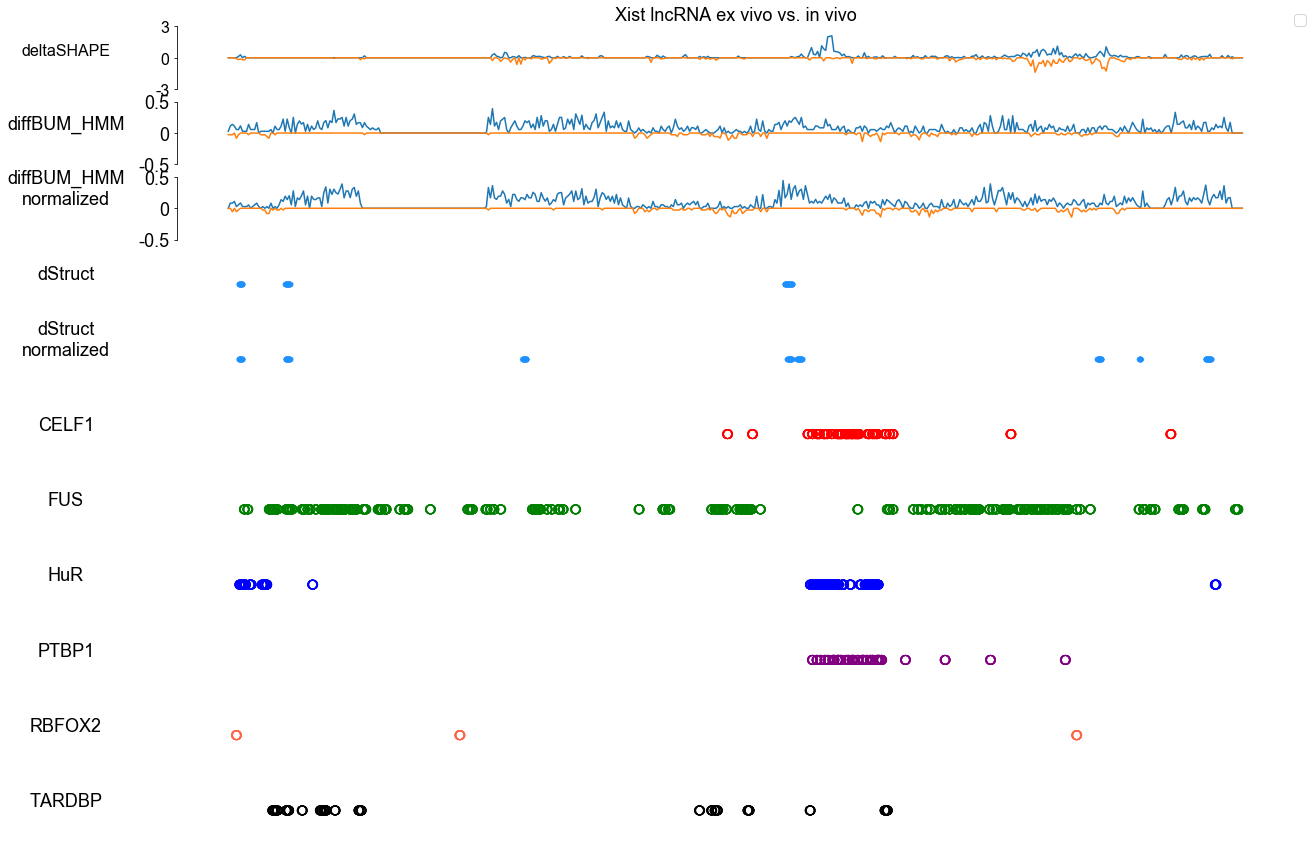

In [61]:
count = 0
numberofplots = 11
threshold = 0.95
nbins = 500

fig,ax = plt.subplots(numberofplots,figsize=[20,15],sharex=True)

nucleotides = alldata[alldata.columns[0:1]].values
nucleotides = np.squeeze(nucleotides)

### deltaSHAPE:
avgdeltashape = alldata[alldata.columns[4:5]].values

exvivo=copy.deepcopy(avgdeltashape)
invivo=copy.deepcopy(avgdeltashape)

exvivo[exvivo < 0] = 0 
invivo[invivo > 0] = 0 

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

xticks = list(np.arange(1,len(alldata.index),1000))

ymin = -3
ymax = 3
formatAxes(ax[count],\
           text_size = 16,\
           ylabel = 'deltaSHAPE',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

ax[count].set_title('Xist lncRNA ex vivo vs. in vivo',fontsize=18)
ax[count].legend((exvivo,invivo), ('More reactive ex vivo', 'More reactive in vivo'), loc=[1,1], fontsize = 16)
ax[count].tick_params(axis='x',which='major',pad=150)

count += 1

### diffBUM_HMM not normalized:
exvivo = previous[previous.columns[12:13]].values
invivo = previous[previous.columns[11:12]].values

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

exvivo[exvivo < threshold] = 0 
invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean*(-1))

ymin = -0.5
ymax = 0.5
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

count += 1

### diffBUM_HMM normalized:
exvivo = alldata[alldata.columns[12:13]].values
invivo = alldata[alldata.columns[11:12]].values

exvivo= np.squeeze(exvivo)
invivo= np.squeeze(invivo)

exvivo[exvivo < threshold] = 0 
invivo[invivo < threshold] = 0 

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=exvivo*exvivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

plus = ax[count].errorbar((_[1:] + _[:-1])/2, mean)

n, _ = np.histogram(nucleotides, bins=nbins)
sy, _ = np.histogram(nucleotides, bins=nbins, weights=invivo)
sy2, _ = np.histogram(nucleotides, bins=nbins, weights=invivo*invivo)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

minus = ax[count].errorbar((_[1:] + _[:-1])/2, mean*(-1))

ymin = -0.5
ymax = 0.5
formatAxes(ax[count],\
           text_size = 18,\
           ylabel = 'diffBUM_HMM\nnormalized',\
           ylim = [ymin,ymax],\
           yticklabels = [ymin,0,ymax],\
           yticks = [ymin,0,ymax],\
           xticks = xticks)

count += 1
name = 'dStruct_DDR'
selection = previous[name][previous[name] > 0]
x = selection.index
y = selection.values
ax[count].scatter(x,y,s=20, facecolors='dodgerblue', edgecolors='dodgerblue', alpha=0.5)
formatAxes(ax[count],ylabel='dStruct',text_size=18)

count += 1
name = 'dStruct_DDR'
selection = alldata[name][alldata[name] > 0]
x = selection.index
y = selection.values
ax[count].scatter(x,y,s=20, facecolors='dodgerblue', edgecolors='dodgerblue', alpha=0.5)
formatAxes(ax[count],ylabel='dStruct\nnormalized',text_size=18)

count += 1
name = 'CELF1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].set_yticks([1])
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='r', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'FUS'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='green', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'HuR'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='blue', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'PTBP1'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='purple', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'RBFOX2'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='tomato', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

count += 1
name = 'TARDBP'
rbp = alldata[name][alldata[name] > 0]
x = rbp.index
y = rbp.values
ax[count].scatter(x,y,s=80, facecolors='none', edgecolors='black', alpha=0.5)
formatAxes(ax[count],ylabel=name,text_size=18)

#fig.align_ylabels()
output_filename = "TEST_diffBUM_HMM_SCALED_DC_Xist_ex_vivo_vs_in_vivo_%s.pdf" % threshold
fig.savefig(output_filename,dpi=300)